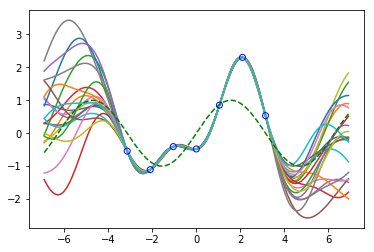

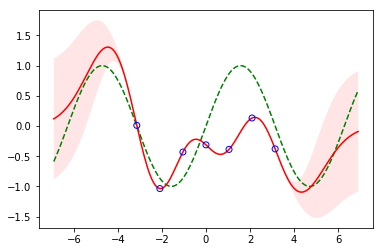

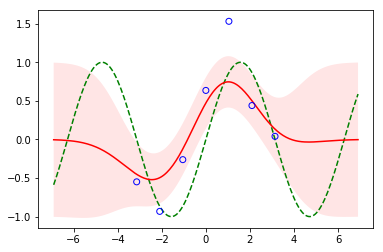

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import math
from numpy.linalg import inv
from scipy.stats import multivariate_normal

pi = math.pi
def SE_cov(X, Y, ls):
    K = np.exp(-cdist(X,Y, 'sqeuclidean')/(ls**2))
    return K

train_n = 7
test_n = 7
error_mean = 0
error_variance = 0.5
X = np.linspace(-math.pi, math.pi, train_n)
X_test = np.linspace(- 1.8 * math.pi, 1.8*math.pi, test_n)

def add_error(X):
    epsilon = np.random.normal(error_mean, math.sqrt(error_variance), len(X))
    return np.sin(X)+epsilon

def posterior(XS, X, Y, sigma, ls):
    x = X[:,None]
    xs = XS[:,None]
    y = Y[:,None]
    k_xs_x = SE_cov(xs,x,ls)
    k_x_x = SE_cov(x,x,ls) + sigma*np.eye(len(x))
    k_xs_xs = SE_cov(xs,xs,ls)
    k_x_xs = SE_cov(x,xs,ls)
    
    mu = np.dot(np.dot(k_xs_x, inv(k_x_x)), Y)
    cov = k_xs_xs - np.dot(np.dot(k_xs_x, inv(k_x_x)), k_x_xs)
    return mu, cov

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import math
from numpy.linalg import inv

pi = math.pi
def SE_cov(X, Y, ls):
    K = np.exp(-cdist(X,Y, 'sqeuclidean')/(ls**2))
    return K

def add_error(X):
    epsilon = np.random.normal(error_mean, math.sqrt(error_variance), len(X))
    return np.sin(X)+epsilon

train_n = 7
test_n = 200
error_mean = 0
error_variance = 0.5
X = np.linspace(-math.pi, math.pi, train_n)
X_test = np.linspace(- 2.2 * math.pi, 2.2*math.pi, test_n)

def posterior(XS, X, Y, sigma, ls):
    x = X[:,None]
    xs = XS[:,None]
    y = Y[:,None]
    k_xs_x = SE_cov(xs,x,ls)
    k_x_x = SE_cov(x,x,ls) + sigma*np.eye(len(x))
    k_xs_xs = SE_cov(xs,xs,ls)
    k_x_xs = SE_cov(x,xs,ls)
    
    mu = np.dot(np.dot(k_xs_x, inv(k_x_x)), Y)
    cov = k_xs_xs - np.dot(np.dot(k_xs_x, inv(k_x_x)), k_x_xs)
    return mu, cov
    
def sample(mu, cov, n):
    return np.random.multivariate_normal(mu, cov, n)

def sampling():
    Y = add_error(X)
    x = X_test
    mu, cov=posterior(x,X,Y,0,2.)
    mu = np.reshape(mu,(test_n,))
    x = x[:,None]
    Z = sample(mu, cov, 20)
    plt.scatter(X,Y, facecolors='none', edgecolors='b',zorder=2)
    for i in range(20):
        plt.plot(x[:],Z[i,:], zorder=1)
    plt.plot(x[:],np.sin(X_test[:]), 'g--', zorder=1)
    plt.show()


sampling()

def predictive(sigma):
    Y = add_error(X)
    x = X_test
    mu, cov=posterior(x,X,Y,sigma,2.)
    mu = np.reshape(mu,(test_n,))
    x = x[:,None]
    plt.scatter(X, Y, facecolors='none', edgecolors='b',zorder=2)
    plt.plot(x,np.sin(x), 'g--', zorder=1)
    plt.plot(x,mu, color = 'r', zorder=1)
    upper = mu + cov.diagonal()
    lower = mu - cov.diagonal()
    ax = plt.gca()
    ax.fill_between(X_test, upper, lower, facecolor='red', interpolate=True, alpha=0.1)
    #plt.title(title)
    plt.show()
    

predictive(0)
predictive(1)